# Case analítico: Desafio de ciência de dados Lighthouse/Indicium  

# Considerações iniciais do projeto:

#### Objetivo:

Este relatório faz parte de um case analítico proposto como projeto teste para vaga de estágio na INDICIUM para a área de ciência de dados e tem como objetivo analisar um banco de dados cinematográfico(IMDB) para encontrar uma forma de orientar qual o tipo de filme que deve ser o próximo a entrar em fase de desenvolvimento.

#### Dicionário dos dados:

aqui estão as colunas que iremos trabalhar neste projeto e o significado de cada uma das variáveis nelas contidas.

| Coluna         | Descrição                                   |
|----------------|--------------------------------------------|
| Genre          | Gênero do filme                             |
| IMDB_Rating    | Nota do IMDB                                |
| Overview       | Overview do filme                           |
| Meta_score     | Média ponderada de todas as críticas       |
| Director       | Diretor do filme                            |
| Star1          | Ator/atriz principal #1                     |
| Star2          | Ator/atriz principal #2                     |
| Star3          | Ator/atriz principal #3                     |
| Star4          | Ator/atriz principal #4                     |
| No_of_Votes    | Número de votos                             |
| Gross          | Faturamento do filme                        |


## 1.0 Carregando bibliotecas que serão utilizadas na primeira parte do projeto(EDA):

In [131]:
#bibliotecas
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from collections import Counter

#estilo adotado no seaborn para cores e estilização dos gráficos
sns.set(style="white")

#### 1.1 configurando o caminho do csv

In [63]:
#caminho para a pasta
path = "C:/Users/orfeu/Desktop/LH_DC_Project/data"

In [105]:
#leitura do dataset que será utilizado
df = pd.read_csv(os.path.join(path, 'desafio_indicium_imdb.csv'))

## 2.0 Exploração inicial dos dados:

#### 2.1 três primeiras linhas da tabela:

In [107]:
display(df.head(3))

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


#### 2.2 informações gerais da tabela

In [113]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


None

#### 2.3 descrição dos dados:

In [207]:
display(df.describe())

,Unnamed: 0,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime_min,Decade,Decada
count,999.000000,998.000000,999.000000,842.000000,9.990000e+02,8.300000e+02,999.000000,998.000000,998.000000
mean,500.000000,1991.214429,7.947948,77.969121,2.716214e+05,6.808257e+07,122.871872,1986.583166,1986.583166
std,288.530761,23.308539,0.272290,12.383257,3.209126e+05,1.098076e+08,28.101227,23.200504,23.200504
min,1.000000,1920.000000,7.600000,28.000000,2.508800e+04,1.305000e+03,45.000000,1920.000000,1920.000000
25%,250.500000,1976.000000,7.700000,70.000000,5.547150e+04,3.245338e+06,103.000000,1970.000000,1970.000000
50%,500.000000,1999.000000,7.900000,79.000000,1.383560e+05,2.345744e+07,119.000000,1990.000000,1990.000000
75%,749.500000,2009.000000,8.100000,87.000000,3.731675e+05,8.087634e+07,137.000000,2000.000000,2000.000000
max,999.000000,2020.000000,9.200000,100.000000,2.303232e+06,9.366622e+08,321.000000,2020.000000,2020.000000


#### 2.4 contagem de dados nulos na tabela:

In [115]:
display(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

#### 2.5 quantos filmes estão duplicados na tabela:

In [209]:
duplicados = df.duplicated(subset=["Series_Title"]).sum()
print(f"Filmes duplicados encontrados: {duplicados}")

Filmes duplicados encontrados: 1


## 3.0 Tratamento inicial dos dados:

#### 3.1 Transformando o ano para número inteiro:

In [119]:
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

#### 3.2 pegar apenas o runtime(tempo de duração) dofilme:

In [123]:
df["Runtime_min"] = df["Runtime"].str.replace(" min", "").astype(float)

#### 3.3 convertendo a coluna de faturamento(gross) para numérica(remoção das vírgulas)

In [126]:
df["Gross"] = df["Gross"].str.replace(",", "")
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

#### 3.4 quebrando os generos de cada filme(as vezes um filme pode ter mais de um genero)

In [133]:
genres = df["Genre"].dropna().str.split(", ")
todos_generos = [g for lista in genres for g in lista]
contagem_generos = Counter(todos_generos)

#### 3.5 Criando uma coluna com a década em que o filme foi lançado:

In [145]:
# Aqui eu achei necessário pois pretendo fazer uma
# correlação da década que o filme foi lançado e seu faturamento,
# a nível de reconhecimento dos dados
df["Decada"] = (df["Released_Year"] // 10) * 10

#### 3.6 tratando dados duplicados:

In [212]:
if duplicados > 0:
    df = df.drop_duplicates(subset=["Series_Title"], keep="first")
    print("Duplicados removidos.")

nulos = df.isnull().sum().sort_values(ascending=False)
display(nulos)

pct_nulos = (df.isnull().mean()*100).sort_values(ascending=False).round(2)
display(pct_nulos)

Duplicados removidos.


Gross            169
Meta_score       156
Certificate      101
Decada             1
Released_Year      1
Decade             1
Star2              0
Runtime_min        0
No_of_Votes        0
Star4              0
Star3              0
Unnamed: 0         0
Star1              0
Series_Title       0
Overview           0
IMDB_Rating        0
Genre              0
Runtime            0
Director           0
dtype: int64

Gross            16.93
Meta_score       15.63
Certificate      10.12
Decada            0.10
Released_Year     0.10
Decade            0.10
Star2             0.00
Runtime_min       0.00
No_of_Votes       0.00
Star4             0.00
Star3             0.00
Unnamed: 0        0.00
Star1             0.00
Series_Title      0.00
Overview          0.00
IMDB_Rating       0.00
Genre             0.00
Runtime           0.00
Director          0.00
dtype: float64

#### 3.7 removendo registros críticos(onde não há ano, duração, nota ou votos):

In [218]:
df = df.dropna(subset=["Released_Year","Runtime","IMDB_Rating","No_of_Votes"])
print("Registros sem ano/duração/nota/votos foram removidos.")

Registros sem ano/duração/nota/votos foram removidos.


#### 3.8 checando o df:

In [222]:
linhas, colunas = df.shape
display(f"Linhas: {linhas}")
display(f"Colunas: {colunas}")

'Linhas: 997'

'Colunas: 19'

## 4.0 Distribuição das variáveis numéricas:

Aqui torna-se necessário olhar a forma das distribuições das principais variáveis numéricas do conjunto. Isso ajudará a entender se temos dados concentrados, assimétricos, com outliers ou qualquer outro atributo que necessite de atenção.

#### 4.1 Notas do IMDB:

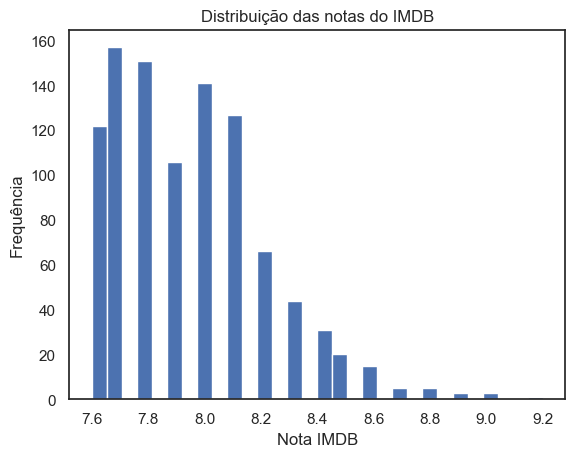

In [228]:
plt.hist(df["IMDB_Rating"].dropna(), bins=30)
plt.title("Distribuição das notas do IMDB")
plt.xlabel("Nota IMDB")
plt.ylabel("Frequência")
plt.show()

#### 4.2 Número de votos:

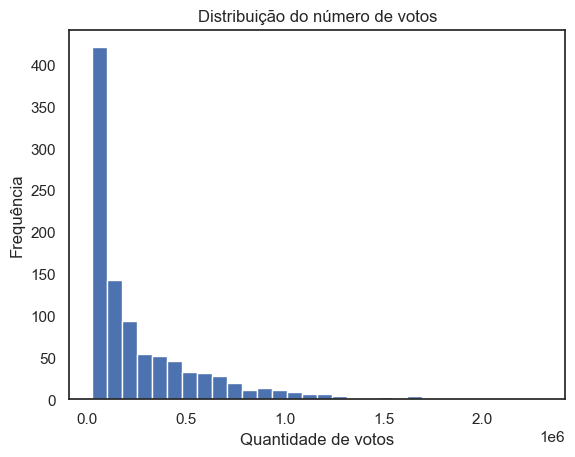

In [226]:
plt.hist(df["No_of_Votes"].dropna(), bins=30)
plt.title("Distribuição do número de votos")
plt.xlabel("Quantidade de votos")
plt.ylabel("Frequência")
plt.show()

#### 4.3 Faturamento(Gross, que foi colocado em log):

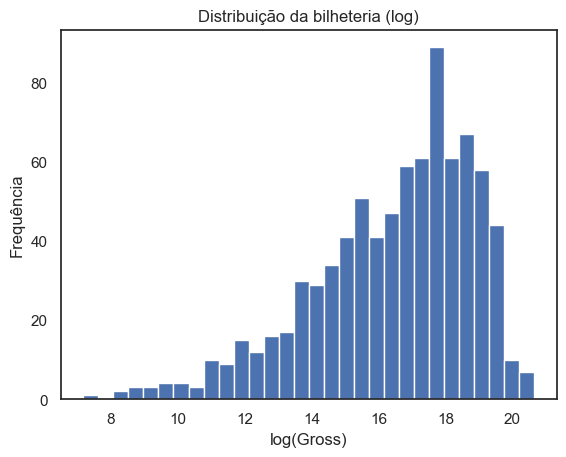

In [232]:
plt.hist(np.log1p(df["Gross"].dropna()), bins=30)
plt.title("Distribuição da bilheteria (log)")
plt.xlabel("log(Gross)")
plt.ylabel("Frequência")
plt.show()

#### 4.4 Tempo de Duração(runtime):

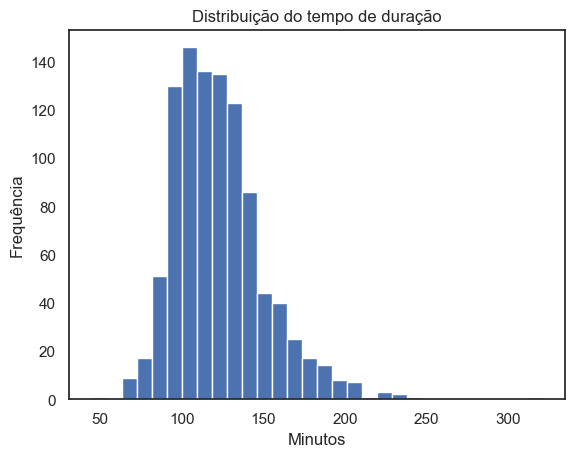

In [234]:
plt.hist(df["Runtime_min"].dropna(), bins=30)
plt.title("Distribuição do tempo de duração")
plt.xlabel("Minutos")
plt.ylabel("Frequência")
plt.show()

## 5.0 Correlação entre as variáveis

#### 5.1

#### 5.2

#### 5.3

#### 5.4

#### 5.5 Análise multivariada: Nota IMDB vs. Faturamento vs. Década

## 6.0 Análise por Gênero Cinematográfico:

#### 6.1 Frequência dos gêneros mais comuns:

#### 6.2 Nota média por gênero:

#### 6.3 Evolução do faturamento mediano ao longo das décadas por gênero(?)

#### 6.4 Faturamento mediano por gênero:

## 7.0 Tendências temporais:

#### 7.1 filmes lançados por década:

#### 7.2 Evolução da nota média ao longo das décadas por gênero(?)

#### 7.3 Evolução do faturamento mediano ao longo das décadas por gênero(?)

## 8.0 Diretores e elenco:

#### 8.1 top 15 diretores com mais filmes

#### 8.2 top 15 diretores com maior faturamento:

#### 8.3 top 15 diretores com as melhores notas: